# Model Calibration Plot

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

In [50]:
# Load data
test_data = pd.read_csv('test.csv')
y_test = test_data['died']

In [51]:
# Get data for predicted probabilities for each model
lr_pred_probs = pd.read_csv('lr_pred_probs.csv')
rf_pred_probs = pd.read_csv('rf_pred_probs.csv')
xgb_pred_probs = pd.read_csv('xgb_pred_probs.csv')
lstm_pred_probs = pd.read_csv('lstm_pred_probs.csv')

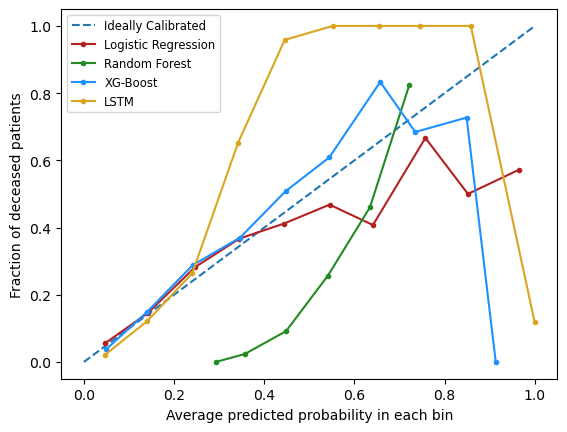

In [82]:
lr_x, lr_y = calibration_curve(y_test, lr_pred_probs, n_bins = 10)
rf_x, rf_y = calibration_curve(y_test, rf_pred_probs, n_bins = 10)
xgb_x, xgb_y = calibration_curve(y_test, xgb_pred_probs, n_bins = 10)
lstm_x, lstm_y = calibration_curve(y_test, lstm_pred_probs, n_bins = 10)

# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(lr_y, lr_x, marker = '.', label = 'Logistic Regression', color='firebrick')
plt.plot(rf_y, rf_x, marker = '.', label = 'Random Forest', color='forestgreen')
plt.plot(xgb_y, xgb_x, marker = '.', label = 'XG-Boost', color='dodgerblue')
plt.plot(lstm_y, lstm_x, marker = '.', label = 'LSTM', color='goldenrod')
 
leg = plt.legend(loc = 'upper left', fontsize = 'small')
plt.xlabel('Average predicted probability in each bin')
plt.ylabel('Fraction of deceased patients')
plt.show()